# Yelp datasets -Classdification

### Intro to this project:

Based on the results of the cluster, we analyzed the factors that will lead to the success of the resteraunts on Yelp. The target varible is the stars of the comments which we used to define the success of the resterants. We compare the differences of the factors in red areas( commercial areas) and blue area (rural area).

### Data:

5000 rows with 35 columns (including the results of NLP)

-- Missing Values (replace with mode)

-- Scaling 

### Model

We used SVM kernel method(svr),Xgboost, Gradiant Boosting, Light Boosting but it all shows the overfitting problem, however, random forest performs the best.

### Further Improvement:

1.Using Gen-Stack which is a stacking methods to emssemble all the models together.

2.As the stars maybe biaed, we may combine both review counts and stars as y variables.
or we may take the average stars of some websites or we analysis the correaltions between the revenue and stars.

# 1.  Look at the Dataset

In [2]:
import pandas as pd
All=pd.read_csv('Pheonix_Final_v2.csv')

In [5]:
All.head()

,Unnamed: 0,business_id,Shortlisted?,ProjectCategory,name,neighborhood,address,city,state,postal_code,...,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,Unnamed: 0.1,weekday,weekend,averghour,if_Chain,polarity
0,0,rDMptJYWtnMhpQu_rRXHng,Yes,Burger,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,...,0,1,0.0,0,3253,0.0,0.0,0.000000,1,0.152415
1,1,1WBkAuQg81kokZIPMpn9Zg,Yes,Burger,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,...,0,0,0.0,0,3229,56.0,22.0,11.142857,1,0.233437
2,2,iPa__LOhse-hobC2Xmp-Kw,Yes,Burger,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,...,0,1,0.0,0,2461,90.0,36.0,18.000000,1,0.104785
3,3,QkG3KUXwqZBW18A9k1xqCA,Yes,Other,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,...,0,0,0.0,0,3022,56.0,23.0,11.285714,0,0.198911
4,4,5XejqzaFmtkZMstJS5Iy-w,Yes,Sandwiches,"""D'Lish Cafe""",NaN,"""503 W Thomas Rd""",Phoenix,AZ,85013,...,0,0,0.0,0,623,25.0,10.0,5.000000,0,0.201747


In [6]:
All.columns

Index([u'Unnamed: 0', u'business_id', u'Shortlisted?', u'ProjectCategory',
       u'name', u'neighborhood', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'stars', u'review_count', u'is_open',
       u'categories', u'label', u'PARKING', u'BikeParking',
       u'HairSpecializesIn_coloring', u'CONSUMER_SERVICE', u'NoiseLevel',
       u'Alcohol', u'Ambience_romantic', u'HappyHour', u'RECOMMENDATION',
       u'DogsAllowed', u'SPECIAL_FOOD', u'AgesAllowed', u'Unnamed: 0.1',
       u'weekday', u'weekend', u'averghour', u'if_Chain', u'polarity'],
      dtype='object')

In [7]:
All1=All.drop(columns=['Unnamed: 0.1','Unnamed: 0','name','address', 'city', 'state', 'postal_code', 'latitude',
       'longitude','categories','business_id'])

### 1.1 Encode Categorical Features

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
listings_missing_df = All1.isnull().mean()*100
listings_missing_df.plot.bar(title='Missing values per column, %')

In [10]:
All1['Shortlisted?']=le.fit_transform(All1['Shortlisted?']) 
All1['ProjectCategory']=le.fit_transform(All1['ProjectCategory']) 
All1=All1.drop(columns=['neighborhood'])
All1['SPECIAL_FOOD'] = All1['SPECIAL_FOOD'].fillna(All1['SPECIAL_FOOD'].mode()[0])

In [11]:
All1.head()

,Shortlisted?,ProjectCategory,stars,review_count,is_open,label,PARKING,BikeParking,HairSpecializesIn_coloring,CONSUMER_SERVICE,...,HappyHour,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,weekday,weekend,averghour,if_Chain,polarity
0,0,3,1.0,10,1,-1,1,0,0,0,...,0,0,1,0.0,0,0.0,0.0,0.000000,1,0.152415
1,0,3,3.0,232,1,-1,1,0,0,0,...,0,0,0,0.0,0,56.0,22.0,11.142857,1,0.233437
2,0,3,3.0,34,1,-1,1,0,0,0,...,0,0,1,0.0,0,90.0,36.0,18.000000,1,0.104785
3,0,18,2.5,37,1,0,0,1,0,0,...,0,0,0,0.0,0,56.0,23.0,11.285714,0,0.198911
4,0,20,4.0,37,0,0,0,0,0,1,...,0,0,0,0.0,0,25.0,10.0,5.000000,0,0.201747


# 2. Import Libaries

In [12]:
# Core Libraries
import numpy as np
import pandas as pd
import datetime
import random

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.classifier import StackingCVClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

#Stats
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

#Preprocess
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Show all the columns instead of part of them
pd.set_option('display.max_columns', None)

#ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

/Users/cindy/anaconda2/lib/python2.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# 3. Checking the missing value data

We are satisified with the reusults that there is only the neighborhood columns which contains a lot of missing values, thus, we decided to drop the neighborhood columns 

### * Extract the datasets for blue area and datasets for red area

In [13]:
Blue=All1.loc[All1['label'] == -1]
Blue.shape

(2327, 23)

In [14]:
Red=All1.loc[All1['label'] == 0]
Red.shape

(1973, 23)

# 4. Explory Data Analysis（Y）

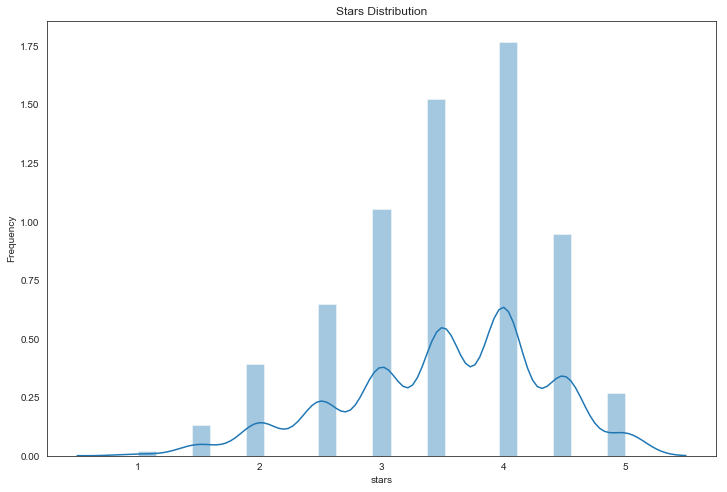

In [15]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.distplot(Blue['stars'])
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.title('Stars Distribution')
plt.show()

# 5. Feature Engineering

### * categorize Y varible

In [16]:
Blue.stars.value_counts()

4.0    610
3.5    525
3.0    363
4.5    326
2.5    223
2.0    135
5.0     92
1.5     46
1.0      7
Name: stars, dtype: int64

In [17]:
## Spliting the y variable
Blue['stars'] = Blue['stars'].astype(float)
star = []
for i in Blue['stars']:
    if i <= 3.5:
        star.append(1)
    else:
        star.append(2)
Blue['stars'] = star

In [18]:
y=Blue['stars']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Blue, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

((1861, 23), (1861,))
((466, 23), (466,))


In [20]:
# Split features and labels
train_labels = X_train['stars'].reset_index(drop=True)
train_features = X_train.drop(['stars'], axis=1)

In [21]:
test_labels = X_test['stars'].reset_index(drop=True)
test_features = X_test.drop(['stars'], axis=1)


### Scaling

In [22]:
train_features = preprocessing.scale(train_features)
test_features = preprocessing.scale(test_features)


# 6. Setup Models

In [24]:
# Light Gradient Boosting Classifiers
lightgbm = LGBMClassifier(boosting_type='gbdt', 
                        num_leaves=6,
                        learning_rate=0.01, 
                        n_estimators=7000,
                        max_bin=200, 
                        bagging_fraction=0.8,
                        bagging_freq=4, 
                        bagging_seed=8,
                        feature_fraction=0.2,
                        feature_fraction_seed=8,
                        min_sum_hessian_in_leaf = 11,
                        verbose=-1,
                        random_state=33)

# XGBoost Classifiers
xgboost = XGBClassifier(learning_rate=0.01,
                        n_estimators=6000,
                        max_depth=4,
                        min_child_weight=0,
                        gamma=0.6,
                        subsample=0.7,
                        colsample_bytree=0.7,
                        objective='multi:softmax',
                        nthread=-1,
                        scale_pos_weight=1,
                        seed=27,
                        reg_alpha=0.00006,
                        random_state=33)

## Elasticnet for feature selection
#elasticnet = make_pipeline(RobustScaler(),
#                           ElasticNetCV(max_iter=1e7))

# Support Vector Classifier
svr = SVC(C=10000, gamma=0.0003)

# Gradient Boosting Classifier
gbr = GradientBoostingClassifier(n_estimators=3000,
                                 learning_rate=0.1,
                                 max_depth=2,
                                 max_features=None,
                                 min_samples_leaf=15,
                                 min_samples_split=10,
                                 #loss='huber',
                                 random_state=33) 

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2400,
                           max_depth=30,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

# # Stack up all the models above, optimized using xgboost
# stack_gen = StackingCVClassifier(classifiers=[lightgbm, svr, xgboost, gbr, rf], 
#                             use_probas=True,
#                             use_features_in_secondary=True,
#                             meta_classifier=lightgbm,
#                             cv=6)

# 7. Train Models

In [26]:
rf = RandomForestClassifier(n_estimators=2400,
                           max_depth=12,
                           min_samples_split=15,
                           min_samples_leaf=15,
                           max_features=None,
                           oob_score=True,
                           random_state=42).fit(train_features, train_labels)

In [27]:
y_predict=rf.predict(test_features)
print(classification_report(test_labels, y_predict))
preds =rf.predict(train_features)
print(classification_report(train_labels, preds))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73       266
           2       0.64      0.56      0.60       200

   micro avg       0.68      0.68      0.68       466
   macro avg       0.67      0.66      0.67       466
weighted avg       0.68      0.68      0.67       466

              precision    recall  f1-score   support

           1       0.76      0.85      0.80      1033
           2       0.78      0.66      0.72       828

   micro avg       0.77      0.77      0.77      1861
   macro avg       0.77      0.76      0.76      1861
weighted avg       0.77      0.77      0.77      1861



### Cross Validation-k-fold 5

In [28]:
scores = cross_val_score(rf, train_features,train_labels, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）Print the 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[0.67024129 0.71849866 0.65951743 0.70889488 0.66846361]
Accuracy: 0.69 (+/- 0.05)


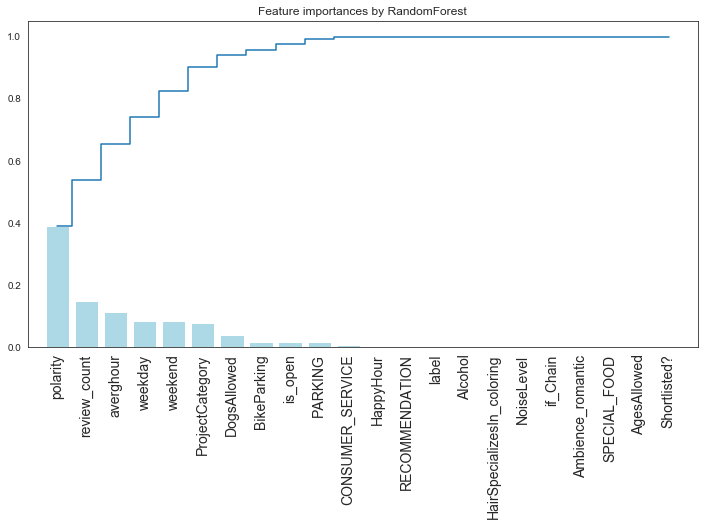

In [29]:
importances = rf.feature_importances_
feat_names = X_train.drop(['stars'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [30]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# rf_roc_auc = roc_auc_score(test_labels, y_predict)
# y_pred_prob = rf.predict_proba(test_features)[:,1]
# fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [31]:
Red['stars'] = Red['stars'].astype(float)
star = []
for i in Red['stars']:
    if i <= 3.5:
        star.append(1)
    else:
        star.append(2)
Red['stars'] = star

In [32]:
Red.head()

,Shortlisted?,ProjectCategory,stars,review_count,is_open,label,PARKING,BikeParking,HairSpecializesIn_coloring,CONSUMER_SERVICE,NoiseLevel,Alcohol,Ambience_romantic,HappyHour,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,weekday,weekend,averghour,if_Chain,polarity
3,0,18,1,37,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,56.0,23.0,11.285714,0,0.198911
4,0,20,2,37,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,25.0,10.0,5.000000,0,0.201747
5,0,19,1,7,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0,69.5,29.0,14.071429,0,0.217009
7,0,4,2,172,1,0,1,0,0,1,0,0,0,0,0,0,0.0,0,57.5,22.5,11.428571,0,0.304418
8,0,13,1,6,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0,26.0,21.0,6.714286,0,0.207411


In [33]:
y=Red['stars']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Red, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

((1578, 23), (1578,))
((395, 23), (395,))


In [35]:
train_labels = X_train['stars'].reset_index(drop=True)
train_features = X_train.drop(['stars'], axis=1)
test_labels = X_test['stars'].reset_index(drop=True)
test_features = X_test.drop(['stars'], axis=1)
train_features = preprocessing.scale(train_features)
test_features = preprocessing.scale(test_features)

### Hyperparameters Tuning -- GridSeach CV 

In [206]:
# parameters = {'n_estimators':[1000,1500,2000,2500,3000,3500], 'max_depth':[11,12,13,14,15,16,17,18,19,20]}
# rf = RandomForestClassifier(n_estimators=2500,
#                            max_depth=19,
#                            min_samples_split=15,
#                            min_samples_leaf=5,
#                            max_features=None,
#                            oob_score=True,
#                            random_state=42)
# rf1 = GridSearchCV(rf, parameters)
# rf1.fit(train_features, train_labels)
# sorted(rf1.cv_results_.keys())

In [36]:
rf = RandomForestClassifier(n_estimators=2500,
                           max_depth=19,
                           min_samples_split=15,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42).fit(train_features, train_labels)

In [37]:
y_predict=rf.predict(test_features)
print(classification_report(test_labels, y_predict))
preds =rf.predict(train_features)
print(classification_report(train_labels, preds))

              precision    recall  f1-score   support

           1       0.72      0.84      0.78       247
           2       0.64      0.47      0.54       148

   micro avg       0.70      0.70      0.70       395
   macro avg       0.68      0.65      0.66       395
weighted avg       0.69      0.70      0.69       395

              precision    recall  f1-score   support

           1       0.84      0.94      0.88       930
           2       0.89      0.74      0.81       648

   micro avg       0.85      0.85      0.85      1578
   macro avg       0.86      0.84      0.85      1578
weighted avg       0.86      0.85      0.85      1578



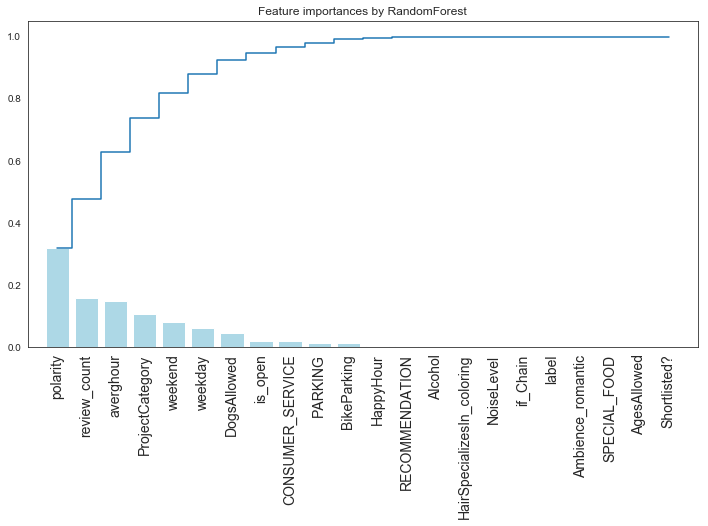

In [38]:
importances = rf.feature_importances_
feat_names = X_train.drop(['stars'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Conclusion:

Based on the above analysis,  polarity of the reviews, review counts, average opening hours, category of the restaurants, weekdays and weekend opening hours are important to the success of the restarants on Yelp. However, the opening hours for blue areas is more important, it may because it is commercial area with higher population, so no matter what is the category of the restarants, it still have a lot of people visit everyday. However, for rurual areas, category pf the resteraunts is more important, which means that people's preference plays an important role in small area.